In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('email.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [106]:
df(2)

TypeError: 'DataFrame' object is not callable

In [3]:
df.shape

(5573, 2)

In [4]:
df.nunique()

Category       3
Message     5158
dtype: int64

In [5]:
df['Category'].value_counts()

Category
ham               4825
spam               747
{"mode":"full"       1
Name: count, dtype: int64

In [6]:
pd.unique(df['Category'])
df['Category'] == '{"mode":"full"'
df.tail()
df = df.drop(5572)

In [7]:
# Encoding target variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['Category'] = encoder.fit_transform(df['Category'])
# ham=0, spam=1

In [8]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int32 
 1   Message   5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [10]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [11]:
df.nunique()

Category       2
Message     5157
dtype: int64

In [12]:
df.duplicated().sum()

415

In [13]:
df.drop_duplicates(subset='Message', keep='last', inplace=True)

In [14]:
df.shape

(5157, 2)

In [15]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

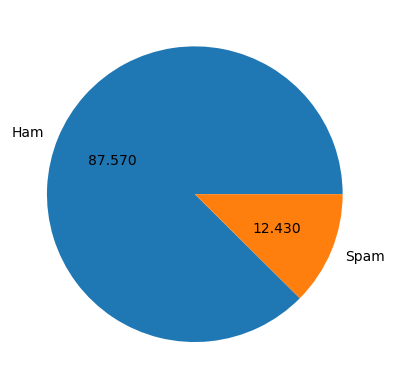

In [16]:
plt.pie(df['Category'].value_counts(), labels = ['Ham', 'Spam'], autopct = '%0.3f')
plt.show()

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\paria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
# Number of Sentences
df['num_sentences'] = df['Message'].apply(lambda x : len(nltk.sent_tokenize(x)))
#df.head()

In [19]:
# Number of words
df['num_words'] = df['Message'].apply(lambda x : len(nltk.word_tokenize(x)))
#df.head()

In [20]:
# number of characters
# Number of Sentences
df['num_chars'] = df['Message'].apply(lambda x : len(x))
#df.head()

In [21]:
df[['num_sentences', 'num_words', 'num_chars']].describe()

,num_sentences,num_words,num_chars
count,5157.000000,5157.000000,5157.000000
mean,1.969750,18.560403,79.103936
std,1.455526,13.405970,58.382922
min,1.000000,1.000000,2.000000
25%,1.000000,9.000000,36.000000
50%,1.000000,15.000000,61.000000
75%,2.000000,26.000000,118.000000
max,38.000000,220.000000,910.000000


In [22]:
# describing on Ham mails
df[df['Category'] == 0][['num_sentences', 'num_words', 'num_chars']].describe()

,num_sentences,num_words,num_chars
count,4516.000000,4516.000000,4516.000000
mean,1.827724,17.267715,70.869353
std,1.394338,13.588065,56.708301
min,1.000000,1.000000,2.000000
25%,1.000000,8.000000,34.000000
50%,1.000000,13.000000,53.000000
75%,2.000000,22.000000,91.000000
max,38.000000,220.000000,910.000000


In [23]:
# describing on Spam mails
df[df['Category'] == 1][['num_sentences', 'num_words', 'num_chars']].describe()

,num_sentences,num_words,num_chars
count,641.000000,641.000000,641.000000
mean,2.970359,27.667707,137.118565
std,1.485575,7.103501,30.399707
min,1.000000,2.000000,7.000000
25%,2.000000,25.000000,130.000000
50%,3.000000,29.000000,148.000000
75%,4.000000,32.000000,157.000000
max,9.000000,46.000000,223.000000


C:\Users\paria\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


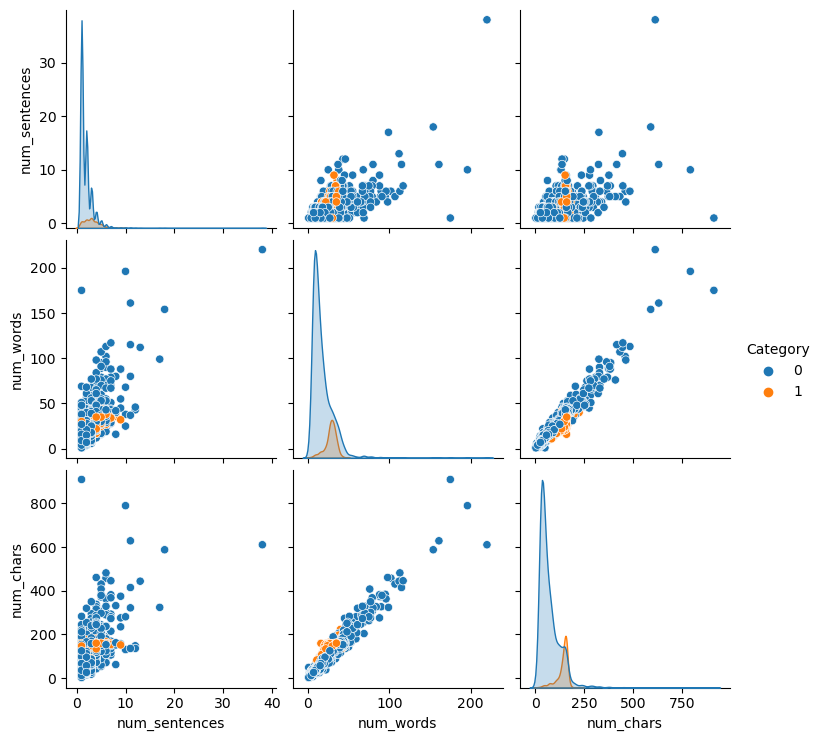

In [24]:
sns.pairplot(df, hue = 'Category')

<Axes: xlabel='num_words', ylabel='Count'>

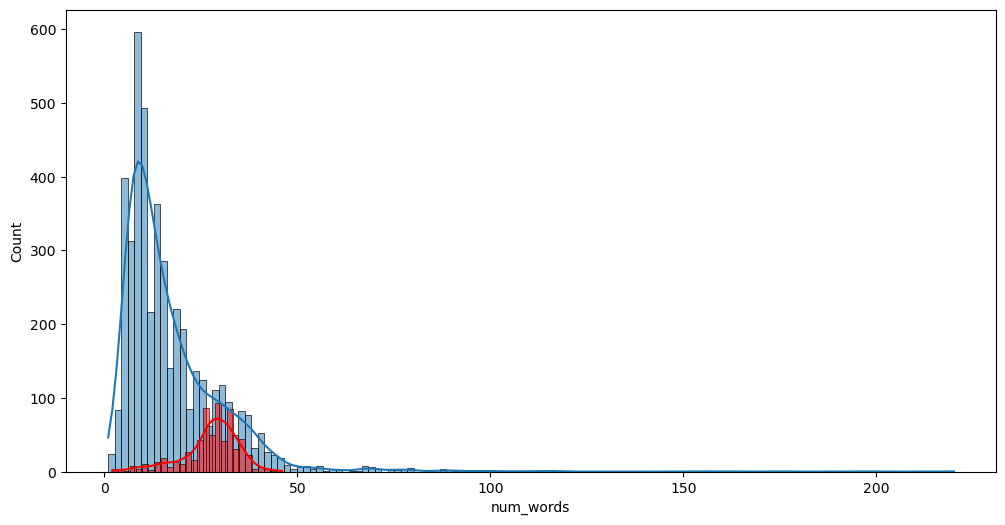

In [25]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['Category'] == 0]['num_words'], kde = True)
sns.histplot(df[df['Category'] == 1]['num_words'], color = 'red', kde = True)

<Axes: xlabel='num_chars', ylabel='Count'>

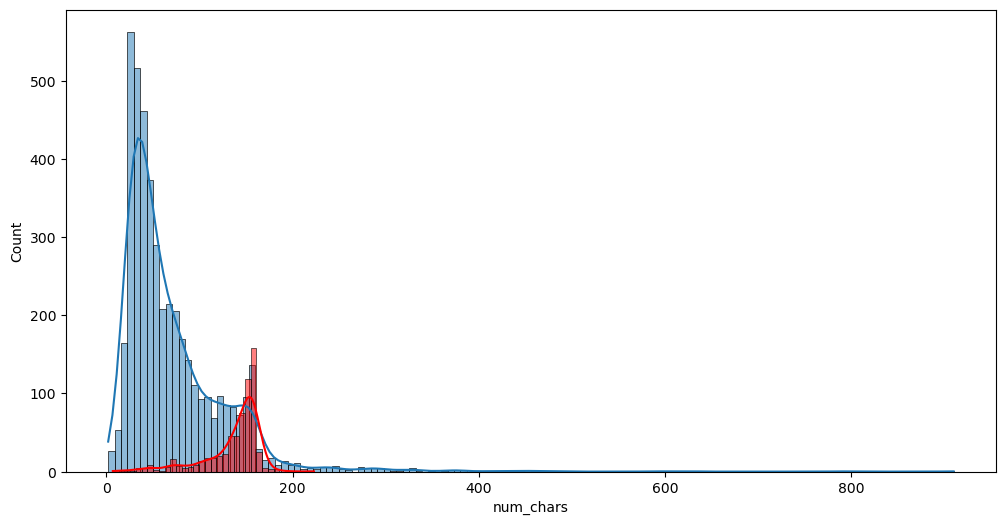

In [26]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['Category'] == 0]['num_chars'], kde = True)
sns.histplot(df[df['Category'] == 1]['num_chars'], color = 'red', kde = True)

In [27]:
df1 = df.drop(labels = ['Message'], axis = 1)
df1.corr()

,Category,num_sentences,num_words,num_chars
Category,1.000000,0.259023,0.255968,0.374409
num_sentences,0.259023,1.000000,0.679396,0.622428
num_words,0.255968,0.679396,1.000000,0.966155
num_chars,0.374409,0.622428,0.966155,1.000000


<Axes: >

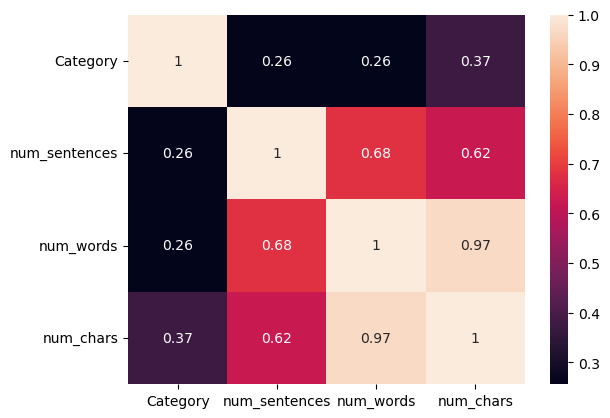

In [28]:
sns.heatmap(df1.corr(), annot = True)

In [29]:
import re, nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\paria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\paria\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
def transform_message(text):
    text = text.lower()
    def clean_text(text):
        rgx = r"[^A-Za-z0-9\s\.]"
        return re.sub(rgx, '', text)
    
    def remove_stop_words(text):
        tokens = text.split()
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        return ' '.join(tokens)
    
    lemmatizer = WordNetLemmatizer()
    def lemmatize_text(text): 
        return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return lemmatize_text(remove_stop_words(clean_text(text)))

#transform_message('Hey how are you on this fine morning on 4th May?')

In [31]:
df['Transformed_Message'] = df['Message'].apply(transform_message)

In [32]:
df.head()

,Category,Message,num_sentences,num_words,num_chars,Transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",2,24,111,go jurong point crazy.. available bugis n grea...
1,0,Ok lar... Joking wif u oni...,2,8,29,ok lar... joking wif u oni...
3,0,U dun say so early hor... U c already then say...,1,13,49,u dun say early hor... u c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",1,15,61,nah dont think go usf life around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,4,39,147,freemsg hey darling 3 week word back id like f...


In [33]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

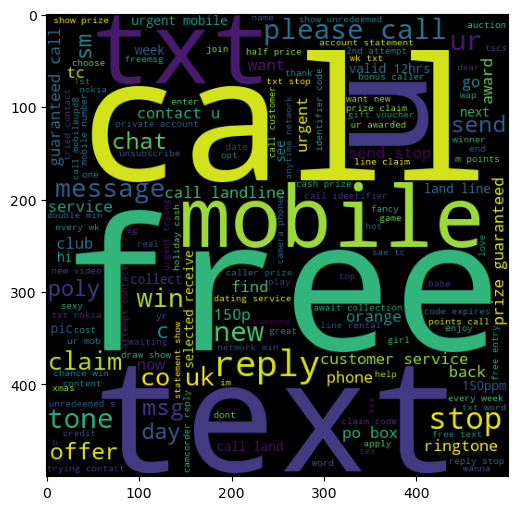

In [34]:
spam_wc = wc.generate(df[df['Category'] == 1]['Transformed_Message'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

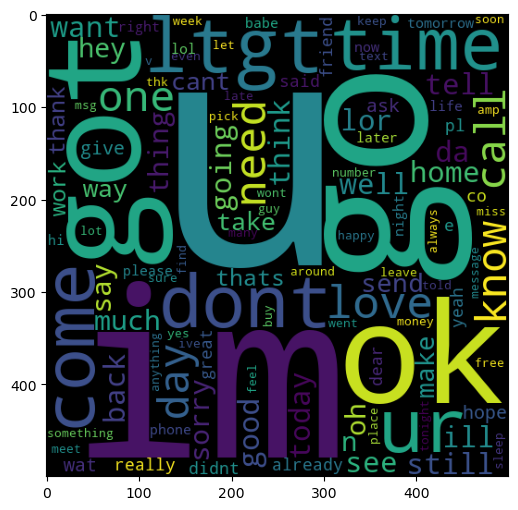

In [35]:
ham_wc = wc.generate(df[df['Category'] == 0]['Transformed_Message'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [36]:
spam_corpus = []
for msg in df[df['Category'] == 1]['Transformed_Message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [37]:
len(spam_corpus)

10712

In [38]:
ham_corpus = []
for msg in df[df['Category'] == 0]['Transformed_Message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [39]:
len(ham_corpus)

38199

In [84]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features= 3000)

In [85]:
#X_cv = cv.fit_transform(df['Transformed_Message']).toarray()
X_tfidf = tfidf.fit_transform(df['Transformed_Message']).toarray()


In [86]:
#print(X_cv.shape)
print(X_tfidf.shape)

(5157, 3000)


In [87]:
y = df['Category'].values

In [88]:
"""from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_tfidf_scaled = scaler.fit_transform(X_tfidf)"""

'from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nX_tfidf_scaled = scaler.fit_transform(X_tfidf)'

In [89]:
"""# append the num_character col to X
X_tfidf_num_chars = np.hstack((X_tfidf,df['num_chars'].values.reshape(-1,1)))"""

"# append the num_character col to X\nX_tfidf_num_chars = np.hstack((X_tfidf,df['num_chars'].values.reshape(-1,1)))"

In [90]:
from sklearn.model_selection import train_test_split

#X_cv_train, X_cv_test, y_cv_train, y_cv_test = train_test_split(X_cv, y, test_size=0.15, random_state=2)
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf, y, test_size=0.15, random_state=2)


In [49]:
# X_tfidf_scaled_train, X_tfidf_scaled_test, y_tfidf_scaled_train, y_tfidf_scaled_test = train_test_split(X_tfidf_scaled, y, test_size=0.15, random_state=2)

In [50]:
# X_tfidf_num_chars_train, X_tfidf_num_chars_test, y_tfidf_num_chars_train, y_tfidf_num_chars_test = train_test_split(X_tfidf_num_chars, y, test_size=0.15, random_state=2)

In [91]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

nb_clfs = {
    #'gb' : GaussianNB(),
    'mnb' : MultinomialNB(),
    #'bnb ': BernoulliNB()
}

In [52]:
"""print('USING COUNTVECTORIZER\n')
for name, clf in nb_clfs.items():
    clf.fit(X_cv_train,y_cv_train)
    y_pred1 = clf.predict(X_cv_test)
    print(name)
    print('-'*30)
    print(f'Accuracy: {accuracy_score(y_cv_test,y_pred1)}')
    print(f'Confusion Matrix:\n {confusion_matrix(y_cv_test,y_pred1)}')
    print(f'Precision: {precision_score(y_cv_test,y_pred1)}')
    print('\n')"""

"print('USING COUNTVECTORIZER\n')\nfor name, clf in nb_clfs.items():\n    clf.fit(X_cv_train,y_cv_train)\n    y_pred1 = clf.predict(X_cv_test)\n    print(name)\n    print('-'*30)\n    print(f'Accuracy: {accuracy_score(y_cv_test,y_pred1)}')\n    print(f'Confusion Matrix:\n {confusion_matrix(y_cv_test,y_pred1)}')\n    print(f'Precision: {precision_score(y_cv_test,y_pred1)}')\n    print('\n')"

In [92]:
print('USING TFIDFVECTORIZER\n')
for name, clf in nb_clfs.items():
    clf.fit(X_tfidf_train,y_tfidf_train)
    y_pred1 = clf.predict(X_tfidf_test)
    print(name)
    print('-'*30)
    print(f'Accuracy: {accuracy_score(y_tfidf_test,y_pred1)}')
    print(f'Confusion Matrix:\n {confusion_matrix(y_tfidf_test,y_pred1)}')
    print(f'Precision: {precision_score(y_tfidf_test,y_pred1)}')
    print('\n')

USING TFIDFVECTORIZER

mnb
------------------------------
Accuracy: 0.9728682170542635
Confusion Matrix:
 [[680   0]
 [ 21  73]]
Precision: 1.0




In [54]:
"""print('USING TFIDFVECTORIZER and MINMAX SCALING\n')
for name, clf in nb_clfs.items():
    clf.fit(X_tfidf_scaled_train,y_tfidf_scaled_train)
    y_pred1 = clf.predict(X_tfidf_scaled_test)
    print(name)
    print('-'*30)
    print(f'Accuracy: {accuracy_score(y_tfidf_scaled_test,y_pred1)}')
    print(f'Confusion Matrix:\n {confusion_matrix(y_tfidf_scaled_test,y_pred1)}')
    print(f'Precision: {precision_score(y_tfidf_scaled_test,y_pred1)}')
    print('\n')"""

"print('USING TFIDFVECTORIZER and MINMAX SCALING\n')\nfor name, clf in nb_clfs.items():\n    clf.fit(X_tfidf_scaled_train,y_tfidf_scaled_train)\n    y_pred1 = clf.predict(X_tfidf_scaled_test)\n    print(name)\n    print('-'*30)\n    print(f'Accuracy: {accuracy_score(y_tfidf_scaled_test,y_pred1)}')\n    print(f'Confusion Matrix:\n {confusion_matrix(y_tfidf_scaled_test,y_pred1)}')\n    print(f'Precision: {precision_score(y_tfidf_scaled_test,y_pred1)}')\n    print('\n')"

In [55]:
"""print('USING TFIDFVECTORIZER and NUM_CHARS\n')
for name, clf in nb_clfs.items():
    clf.fit(X_tfidf_num_chars_train,y_tfidf_num_chars_train)
    y_pred1 = clf.predict(X_tfidf_num_chars_test)
    print(name)
    print('-'*30)
    print(f'Accuracy: {accuracy_score(y_tfidf_num_chars_test,y_pred1)}')
    print(f'Confusion Matrix:\n {confusion_matrix(y_tfidf_num_chars_test,y_pred1)}')
    print(f'Precision: {precision_score(y_tfidf_num_chars_test,y_pred1)}')
    print('\n')"""

"print('USING TFIDFVECTORIZER and NUM_CHARS\n')\nfor name, clf in nb_clfs.items():\n    clf.fit(X_tfidf_num_chars_train,y_tfidf_num_chars_train)\n    y_pred1 = clf.predict(X_tfidf_num_chars_test)\n    print(name)\n    print('-'*30)\n    print(f'Accuracy: {accuracy_score(y_tfidf_num_chars_test,y_pred1)}')\n    print(f'Confusion Matrix:\n {confusion_matrix(y_tfidf_num_chars_test,y_pred1)}')\n    print(f'Precision: {precision_score(y_tfidf_num_chars_test,y_pred1)}')\n    print('\n')"

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [57]:
clfs = {
    'SVC' : SVC(kernel='sigmoid', gamma=1.0),
    'KNN' : KNeighborsClassifier(), 
    'Multinomial NB': MultinomialNB(), 
    'Decision Tree': DecisionTreeClassifier(max_depth=5), 
    'Logistic Regression': LogisticRegression(solver='liblinear', penalty='l1'), 
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=2), 
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=2), 
    'BgC': BaggingClassifier(n_estimators=50, random_state=2),
    'GBDT': GradientBoostingClassifier(n_estimators=50,random_state=2),
    'XGBoost':XGBClassifier(n_estimators=50,random_state=2)
}

In [58]:
accuracy_scores = []
precision_scores = []

print('USING TFIDFVECTORIZER\n')
for name, clf in clfs.items():
    clf.fit(X_tfidf_train,y_tfidf_train)
    y_pred1 = clf.predict(X_tfidf_test)
    print(name)
    print('-'*30)
    print(f'Accuracy: {accuracy_score(y_tfidf_test,y_pred1)}')
    print(f'Confusion Matrix:\n {confusion_matrix(y_tfidf_test,y_pred1)}')
    print(f'Precision: {precision_score(y_tfidf_test,y_pred1)}')
    print('\n')
    accuracy_scores.append(accuracy_score(y_tfidf_test,y_pred1))
    precision_scores.append(precision_score(y_tfidf_test,y_pred1))

USING TFIDFVECTORIZER

SVC
------------------------------
Accuracy: 0.979328165374677
Confusion Matrix:
 [[679   1]
 [ 15  79]]
Precision: 0.9875


KNN
------------------------------
Accuracy: 0.917312661498708
Confusion Matrix:
 [[680   0]
 [ 64  30]]
Precision: 1.0


Multinomial NB
------------------------------
Accuracy: 0.9728682170542635
Confusion Matrix:
 [[680   0]
 [ 21  73]]
Precision: 1.0


Decision Tree
------------------------------
Accuracy: 0.9418604651162791
Confusion Matrix:
 [[672   8]
 [ 37  57]]
Precision: 0.8769230769230769


Logistic Regression
------------------------------
Accuracy: 0.9573643410852714
Confusion Matrix:
 [[676   4]
 [ 29  65]]
Precision: 0.9420289855072463


Random Forest
------------------------------
Accuracy: 0.9715762273901809
Confusion Matrix:
 [[678   2]
 [ 20  74]]
Precision: 0.9736842105263158




C:\Users\paria\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost
------------------------------
Accuracy: 0.9573643410852714
Confusion Matrix:
 [[672   8]
 [ 25  69]]
Precision: 0.8961038961038961


BgC
------------------------------
Accuracy: 0.9638242894056848
Confusion Matrix:
 [[670  10]
 [ 18  76]]
Precision: 0.8837209302325582


GBDT
------------------------------
Accuracy: 0.9573643410852714
Confusion Matrix:
 [[677   3]
 [ 30  64]]
Precision: 0.9552238805970149


XGBoost
------------------------------
Accuracy: 0.9689922480620154
Confusion Matrix:
 [[675   5]
 [ 19  75]]
Precision: 0.9375




In [59]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [60]:
accuracy_scores

[0.979328165374677,
 0.917312661498708,
 0.9728682170542635,
 0.9418604651162791,
 0.9573643410852714,
 0.9715762273901809,
 0.9573643410852714,
 0.9638242894056848,
 0.9573643410852714,
 0.9689922480620154]

In [61]:
performance_df

,Algorithm,Accuracy,Precision
1,KNN,0.917313,1.000000
2,Multinomial NB,0.972868,1.000000
0,SVC,0.979328,0.987500
5,Random Forest,0.971576,0.973684
8,GBDT,0.957364,0.955224
4,Logistic Regression,0.957364,0.942029
9,XGBoost,0.968992,0.937500
6,AdaBoost,0.957364,0.896104
7,BgC,0.963824,0.883721
3,Decision Tree,0.941860,0.876923


In [75]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
knn = KNeighborsClassifier()

In [76]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('knn', knn)],voting='hard')


In [77]:
voting.fit(X_tfidf_train,y_tfidf_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('knn', KNeighborsClassifier())])

In [78]:
y_pred = voting.predict(X_tfidf_test)
print('USING VOTING CLASSIFIER')
print('-'*30)
print(f'Accuracy: {accuracy_score(y_tfidf_test,y_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_tfidf_test,y_pred)}')
print(f'Precision: {precision_score(y_tfidf_test,y_pred)}')
print('\n')

USING VOTING CLASSIFIER
------------------------------
Accuracy: 0.9728682170542635
Confusion Matrix:
 [[680   0]
 [ 21  73]]
Precision: 1.0




In [79]:
# Applying stacking
from sklearn.ensemble import StackingClassifier

estimators=[('svm', svc), ('nb', mnb), ('knn', knn)]
final_estimator=RandomForestClassifier()

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [80]:
clf.fit(X_tfidf_train,y_tfidf_train)

StackingClassifier(estimators=[('svm',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=RandomForestClassifier())

In [81]:
y_pred = clf.predict(X_tfidf_test)
print('USING STACKING CLASSIFIER')
print('-'*30)
print(f'Accuracy: {accuracy_score(y_tfidf_test,y_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_tfidf_test,y_pred)}')
print(f'Precision: {precision_score(y_tfidf_test,y_pred)}')
print('\n')

USING STACKING CLASSIFIER
------------------------------
Accuracy: 0.9780361757105943
Confusion Matrix:
 [[676   4]
 [ 13  81]]
Precision: 0.9529411764705882




After all these we can observe that multinomial naive bayes has the highest accuracy while keeping the precision as 1 as precision is the determining criteria here(we don't want false positives at any cost)

In [95]:
model = mnb
model.fit(X_tfidf_train, y_tfidf_train)

MultinomialNB()

In [98]:
y_pred = model.predict(X_tfidf_test)

In [99]:
precision_score(y_tfidf_test, y_pred)

1.0

In [100]:
accuracy_score(y_tfidf_test, y_pred)

0.9728682170542635

In [104]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))